# PyTorch: Classification

This notebook uses pytorch to solve a binary classification problem. `data/x_class.txt` contains the inputs and `data/y_class.txt` contains the labels.

Importing the relevant modules.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

Loading data from `x_class.txt` and `y_class.txt` and creating two numpy arrays, `x` and `y`, containing the respective data. 

In [ ]:
# load data
x = np.loadtxt('data/x_class.txt')
y = np.loadtxt('data/y_class.txt')

Scatter plot of x values with different colours for the values labelled with 0 and the ones labelled with 1.

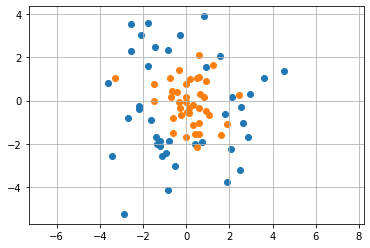

In [ ]:
# Visualize data
plt.scatter(x[0,y==1], x[1,y==1])
plt.scatter(x[0,y==0], x[1,y==0])
plt.axis('equal')
plt.grid()

Converting the data to `torch.tensors` and create a suitable `DataLoader` object

In [ ]:
# convert x, y to tensors
y_t = torch.tensor(y).float().reshape(-1,1)
x_t = torch.t(torch.tensor(x).float())
# build a data set
batch_size = 30
dataloader_LogReg = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_t,y_t),
                                                batch_size = batch_size)

Defining the NN.

In [ ]:
class Net_LogReg(nn.Module):
    """
    Neural Network with inputs:
    layer_sizes = tuple specifying the number of neurons in each layer
    act_hid = activation function at the hidden layers
    act_out = activation function at the output
    """
    # initialize the network and define all learnable parameters
    def __init__(self, layer_sizes, act_hid, act_out): #, act_hid, act_out):
        super(Net_LogReg, self).__init__()
        self.L = len(layer_sizes)
        self.layers = nn.ModuleList() # initialize empty module list
        self.act_hid = act_hid
        self.act_out = act_out
        for k in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[k], layer_sizes[k+1]))

# define the forward pass
    def forward(self, x):
        for k in range(self.L - 2):
            x = self.act_hid(self.layers[k](x))
        x = self.act_out(self.layers[self.L - 2](x))
        return x

In [ ]:
# Initialize the model
torch.manual_seed(1)
net = Net_LogReg((2,10,10,1), nn.ReLU(), torch.sigmoid)    

In [ ]:
def train(NeuralNetwork,dataloader,loss_function, num_epochs, lr=0.001):
    """
    NeuralNetwork = neural network to be trained
    dataloader = DataLoader that deals batches for mini-batch learning
    loss_function = cost function to be optimized
    num_epochs = number of training epochs
    lr = learning rate (default value 0.001)
    """
    optimizer = torch.optim.SGD(NeuralNetwork.parameters(), lr = lr)
    for epoch in range(num_epochs):
        for inputs,labels in dataloader:
            # forward propagation
            outputs = NeuralNetwork(inputs)
            # compute loss
            loss = loss_function(outputs, labels)
            # reset gradient
            optimizer.zero_grad()
            # backprop
            loss.backward()
            # update parameters
            optimizer.step()

        if (epoch % 1000) == 0:
            print('Epoch: ',epoch, 'Loss: ', loss.detach().numpy())
    

In [ ]:
# training
train(net, dataloader_LogReg,nn.BCELoss(),10000, 0.003)

Epoch:  0 Loss:  0.6960558
Epoch:  1000 Loss:  0.4720264
Epoch:  2000 Loss:  0.36488137
Epoch:  3000 Loss:  0.30763003
Epoch:  4000 Loss:  0.27728003
Epoch:  5000 Loss:  0.26041067
Epoch:  6000 Loss:  0.24754575
Epoch:  7000 Loss:  0.23945145
Epoch:  8000 Loss:  0.2322062
Epoch:  9000 Loss:  0.22594447


In [ ]:
def plot_decision_boundary_torch(x, y, net):
    h = 0.05
    x0_min, x0_max = x[0,:].min() - 1, x[0,:].max() + 1
    x1_min, x1_max = x[1,:].min() - 1, x[1,:].max() + 1
    x0_grid, x1_grid = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))                   
    xx = torch.tensor(np.hstack([x0_grid.reshape((-1,1)),x1_grid.reshape((-1,1))])).float()   
    a = net(xx).detach().numpy().reshape(x0_grid.shape)
    plt.contour(x0_grid, x1_grid, a, [0.5], colors=('k',))      

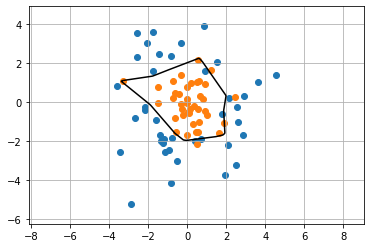

In [ ]:
# Plot
plot_decision_boundary_torch(x, y, net)
# Visualize data
plt.scatter(x[0,y==1], x[1,y==1])
plt.scatter(x[0,y==0], x[1,y==0])
plt.axis('equal')
plt.grid()